# Cross validation
## Mateusz Baran
### 155620

In [123]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split

In [124]:
dataset = pd.read_csv('data/VLagun_Phys_Years3.csv')
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


In [125]:
X = dataset.iloc[:,0:7]
y = dataset.iloc[:,8]

In [126]:
X.shape, y.shape

((120, 7), (120,))

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [128]:
features, targets = X, y

In [129]:
def get_dataset(n_samples=120):
    X, y = make_classification(n_samples=n_samples, n_features=7, random_state=1, n_classes=2)
    return X, y

In [130]:
def get_model():
    model = LogisticRegression()
    return model

In [131]:
# evaluate the model using a given test cindition
def evaluate_model(cv):
    X, y = get_dataset()
    model = get_model()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
    return mean(scores), scores.min(), scores.max()

In [132]:
# calculate the idea test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min.max of each set of results
means, mins, maxs =  list(), list(), list()

Ideal: 0.867


In [133]:
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f, %.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # stare min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

> folds=2, accuracy=0.833 (0.817, 0.850)
> folds=3, accuracy=0.883 (0.825, 0.925)
> folds=4, accuracy=0.867 (0.767, 0.967)
> folds=5, accuracy=0.883 (0.792, 1.000)
> folds=6, accuracy=0.867 (0.750, 1.000)
> folds=7, accuracy=0.866 (0.647, 1.000)
> folds=8, accuracy=0.858 (0.667, 1.000)
> folds=9, accuracy=0.866 (0.615, 1.000)
> folds=10, accuracy=0.867 (0.583, 1.000)
> folds=11, accuracy=0.868 (0.636, 1.000)
> folds=12, accuracy=0.867 (0.600, 1.000)
> folds=13, accuracy=0.866 (0.556, 1.000)
> folds=14, accuracy=0.862 (0.667, 1.000)
> folds=15, accuracy=0.867 (0.500, 1.000)
> folds=16, accuracy=0.869 (0.500, 1.000)
> folds=17, accuracy=0.867 (0.429, 1.000)
> folds=18, accuracy=0.872 (0.571, 1.000)
> folds=19, accuracy=0.866 (0.500, 1.000)
> folds=20, accuracy=0.867 (0.500, 1.000)
> folds=21, accuracy=0.871 (0.500, 1.000)
> folds=22, accuracy=0.867 (0.400, 1.000)
> folds=23, accuracy=0.857 (0.400, 1.000)
> folds=24, accuracy=0.858 (0.400, 1.000)
> folds=25, accuracy=0.864 (0.400, 1.000)


Najlepsze accuracy wyszło dla folds: 3 oraz 5:  
folds=3, accuracy=0.883 (0.825, 0.925)
folds=5, accuracy=0.883 (0.792, 1.000)

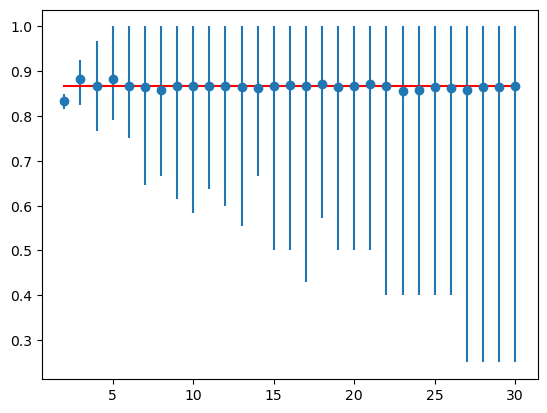

In [134]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()

### Implementacja K-fold Cross-Validation w Scikit-Learn

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
dataset = pd.read_csv('data/VLagun_Phys_Years3.csv')
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


In [137]:
X = dataset.iloc[:, :7].values
y = dataset.iloc[:, 8].values

In [138]:
X

array([[3.7576240e+00, 9.4600000e+00, 1.8300000e+01, 5.2000000e+01,
        7.5000000e+00, 8.5650000e+00, 3.5000000e+00],
       [3.5047070e+00, 9.8900000e+00, 1.9100000e+01, 5.0000000e+01,
        7.8600000e+00, 8.5200000e+00, 0.0000000e+00],
       [3.7576240e+00, 9.6600000e+00, 1.8100000e+01, 5.9000000e+01,
        8.1720000e+00, 8.4915000e+00, 1.0000000e+00],
       [3.1072660e+00, 1.0360000e+01, 1.9500000e+01, 4.6000000e+01,
        7.8480000e+00, 8.8320000e+00, 0.0000000e+00],
       [2.6194975e+00, 1.1560000e+01, 1.9000000e+01, 4.2000000e+01,
        7.5360000e+00, 9.2400000e+00, 0.0000000e+00],
       [3.2698555e+00, 9.6600000e+00, 1.7600000e+01, 5.9000000e+01,
        7.8430000e+00, 7.9790000e+00, 5.0000000e+00],
       [2.7098250e+00, 1.2120000e+01, 1.9700000e+01, 7.2000000e+01,
        8.2060000e+00, 8.7176000e+00, 1.0000000e+00],
       [3.3782485e+00, 9.4200000e+00, 1.7800000e+01, 5.8000000e+01,
        7.1390000e+00, 8.7586000e+00, 4.0000000e+00],
       [3.7214930e+00, 9

In [139]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [140]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('Mapping of Label Encoded Classes', label_encoder_name_mapping, sep='\n')
print('Label Encoded Target Variable', encoded_y, sep='\n' )

Mapping of Label Encoded Classes
{0: 0, 1: 1}
Label Encoded Target Variable
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [141]:
from sklearn.model_selection import cross_validate

In [142]:
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(
        estimator=model,
        X=_X,
        y=_y,
        cv=_cv,
        scoring=_scoring,
        return_train_score=True,
    )
    return {
        'Training Accuracy scores': results['train_accuracy'],
        'Mean Training Accuracy': results['train_accuracy'].mean()*100,
        'Training Precision scores': results['train_precision'],
        'Mean Training Precision': results['train_precision'].mean(),
        'Training Recall scores': results['train_recall'],
        'Mean Training Recall': results['train_recall'].mean(),
        'Training F1 scores': results['train_f1'],
        'Mean Training F1 scores': results['train_f1'].mean(),
        'Validation Accuracy scores': results['test_accuracy'],
        'Mean Validation Accuracy scores': results['test_accuracy'].mean()*100,
        'Validation Precision scores': results['test_precision'],
        'Mean Validation Precision scores': results['test_precision'].mean(),
        'Validation Recall scores': results['test_recall'],
        'Mean Validation Recall': results['test_recall'].mean(),
        'Validation F1 scores': results['test_f1'],
        'Mean Validation F1 scores': results['test_f1'].mean(),
    }

In [143]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(12,6))
    labels = ['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold']
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis - 0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis + 0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

### Uczenie modelu
Teraz możemy trenować nasz algorytm uczenia maszynowego. Wykorzystamy algorytm drzewa decyzyjnego. Importujemy DecisionTreeClassifierz tree modułu biblioteki Scikit-Learn. Wywołujemy również cross_validation funkcję, którą stworzyliśmy wcześniej, aby przeprowadzić 5-krotną walidację krzyżową.

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_resul = cross_validation(decision_tree_model, X, encoded_y, 5)

for key, value in decision_tree_resul.items():
    print(f'{key}:  {value}')
    print('-'*90)

Training Accuracy scores:  [1. 1. 1. 1. 1.]
------------------------------------------------------------------------------------------
Mean Training Accuracy:  100.0
------------------------------------------------------------------------------------------
Training Precision scores:  [1. 1. 1. 1. 1.]
------------------------------------------------------------------------------------------
Mean Training Precision:  1.0
------------------------------------------------------------------------------------------
Training Recall scores:  [1. 1. 1. 1. 1.]
------------------------------------------------------------------------------------------
Mean Training Recall:  1.0
------------------------------------------------------------------------------------------
Training F1 scores:  [1. 1. 1. 1. 1.]
------------------------------------------------------------------------------------------
Mean Training F1 scores:  1.0
----------------------------------------------------------------------------

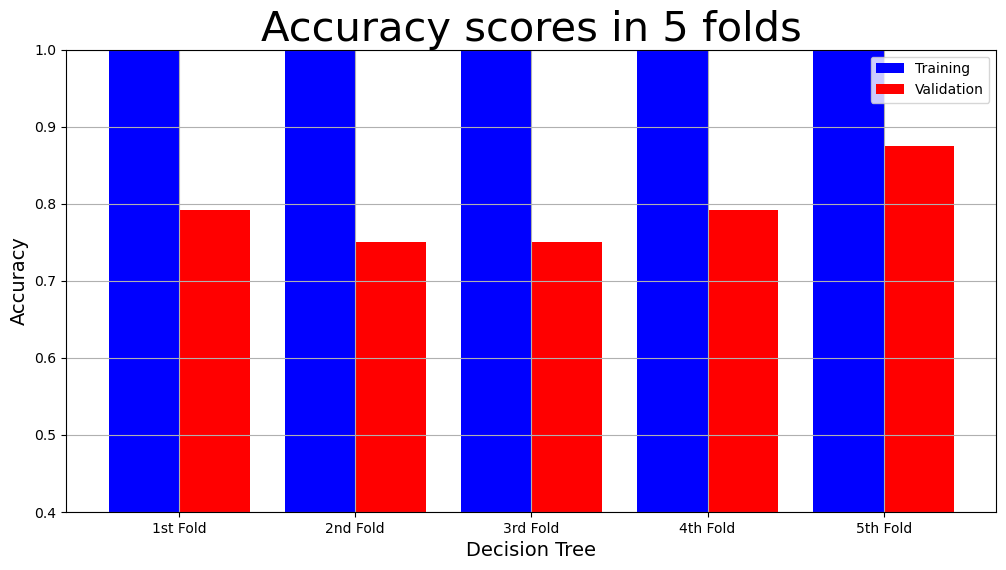

In [146]:
model_nane = 'Decision Tree'
plot_result(
    model_nane,
    'Accuracy',
    'Accuracy scores in 5 folds',
    decision_tree_resul['Training Accuracy scores'],
    decision_tree_resul['Validation Accuracy scores']
)

### wizualizacja precyzja szkolenia

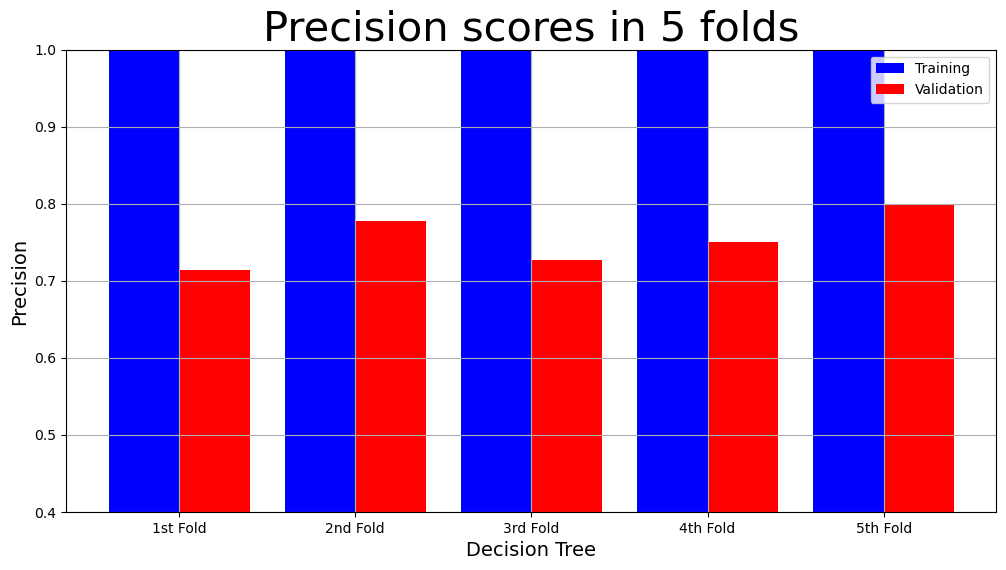

In [147]:
plot_result(
    model_nane,
    'Precision',
    'Precision scores in 5 folds',
    decision_tree_resul['Training Precision scores'],
    decision_tree_resul['Validation Precision scores']
)

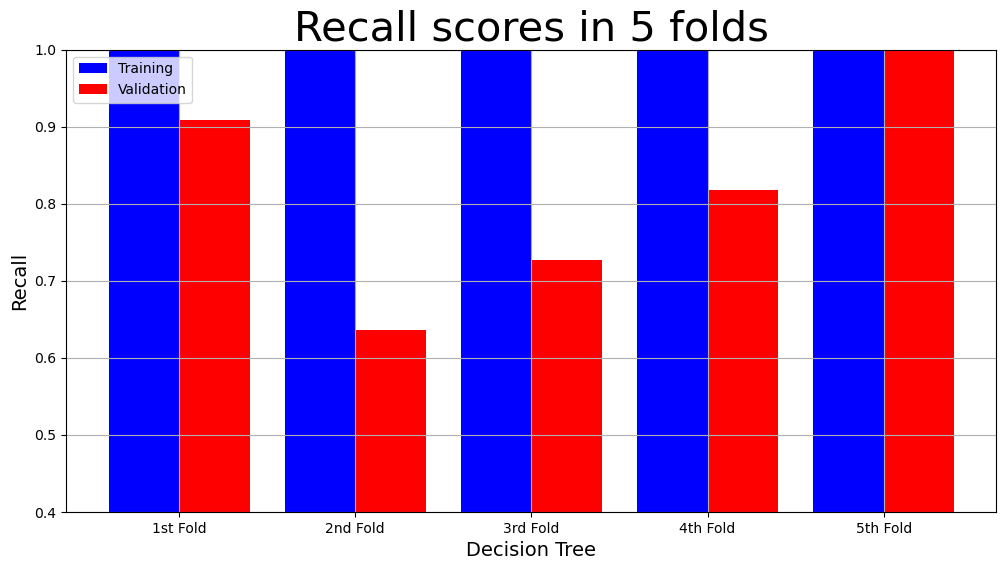

In [148]:
plot_result(
    model_nane,
    'Recall',
    'Recall scores in 5 folds',
    decision_tree_resul['Training Recall scores'],
    decision_tree_resul['Validation Recall scores']
)

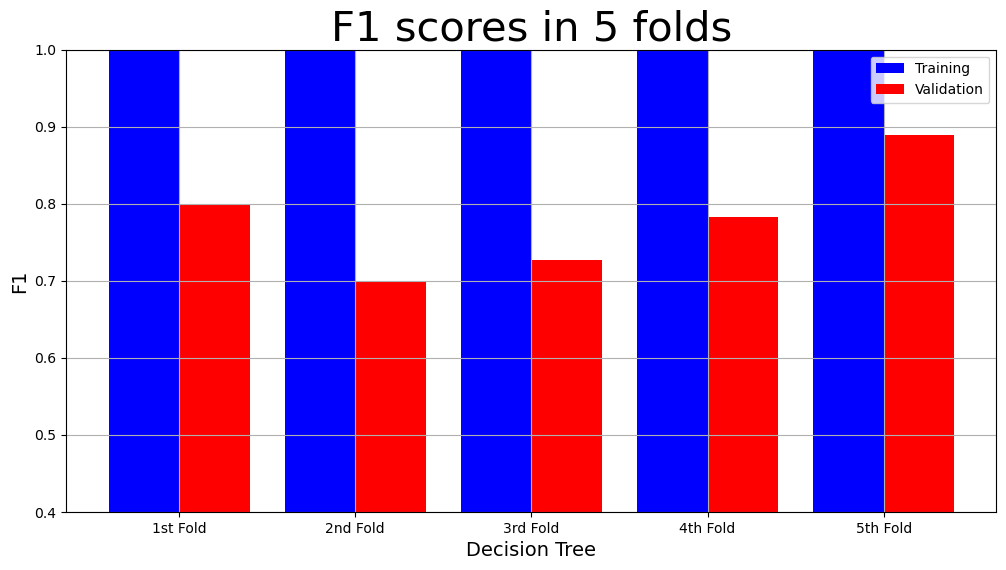

In [149]:
plot_result(
    model_nane,
    'F1',
    'F1 scores in 5 folds',
    decision_tree_resul['Training F1 scores'],
    decision_tree_resul['Validation F1 scores']
)